## Final Project Submission

Please fill out:
* Student name: Kosta Tzioumis
* Student pace: part time
* Scheduled project review date/time: tbd
* Instructor name: Eli Thomas
* Blog post URL: ...yeah I'll get right on that



Import necessary modules to begin:

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

load dataset into pandas dataframe to begin analysis! 
View first 5 rows to get a feel for data and data types

In [5]:
df=pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Inspect the the data frame info, looking for overall size, variables with significant missing data, variable datatypes are what is expected

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [9]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

waterfront and yr_renovated both have many missing values, missing values also present in view but very few.

Tackle these one at a time starting with waterfront

In [10]:
df.waterfront.value_counts()


0.0    19075
1.0      146
Name: waterfront, dtype: int64

Categorical feature representing whether or not the house is on the waterfront. Very few houses are 1.0. 
Waterfront locations appear to be quite rare, I don't think it is unreasonable to set the missing values to 0

In [11]:
df.waterfront.fillna(value=0,inplace=True)
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

OK, thats waterfront missing values taken care of, while I'm at it this feature is categorical not numeric, I'm goign to change it datatype=category

In [15]:
df.waterfront=df.waterfront.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null category
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: category(1), float64(7), int64(11), object(2)
memory usage: 3.3+ M

Now I'll investigate the missing vales on view as its likely to be a similar scenario

In [16]:
df.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

The feature describes the number of times a house has been viewed. There is a 0.0 value that represents the house has not been viewed, it is most reasonable to expect missing values to be unviewed
This feature is numerical but could also be considered categorical (I'll come back to it)


In [17]:
df.view.fillna(value=0.0,inplace=True)
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Onto the last of the missing data - yr_renovated. This is a numerical feature representing a the year of renovation. Start by getting some basic statistics on the data

In [18]:
df.yr_renovated.describe()

count    17755.000000
mean        83.636778
std        399.946414
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

This would indicate alot of 0's in the data, these could also be considered missing data as the house cannot have been renovated in the year 0. 0 is a placeholder. Most likely indicating the house has not been renovated since building

In [36]:
df.yr_renovated.value_counts()

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

Yep, 17 thousand 0s, by far the most common entry. For now I'm goign to set the missing data to 0 and consider how to deal with this feature later

In [27]:
df.yr_renovated.fillna(value=0.0,inplace=True)
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

NO MORE MISSING DATA!! (or is there?)
Most of the data is numerical but there were 2 object data types in the initial info description - date and sqft_basement
date is date string this makes sense (but we'll check it for nonsense anyway)
sqft_basement should be a numerical feature, why isnt it? Maybe some weird shit here

In [32]:
df.sqft_basement.describe()

count     21597
unique      304
top         0.0
freq      12826
Name: sqft_basement, dtype: object

In [35]:
df.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
900.0       142
300.0       142
200.0       105
750.0       104
530.0       103
450.0       103
480.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
1100.0       78
670.0        78
550.0        76
780.0        76
650.0        75
240.0        74
680.0        73
380.0        73
850.0        72
          ...  
20.0          1
2580.0        1
2190.0        1
1548.0        1
2490.0        1
283.0         1
556.0         1
792.0         1
1920.0        1
946.0         1
784.0         1
417.0         1
1245.0        1
935.0         1
143.0         1
906.0         1
3260.0        1
1990.0        1
295.0         1
248.0         1
666.0         1
4820.0        1
65.0          1
1024.0        1
516.0         1
2810.0        1
243.0         1
2120.0        1
2390.0        1
915.0         1
Name: sqft_basement, Len

'?' appears to have been used as placeholder for missing data. There are also a lot of 0's in this data, presumably from houses without basements. From our column descriptions the sqft_basement is the difference between the sqft_living and sqft_above. SO I'm goign to take a look at these variale too to determine what to do with this missing data

In [37]:
df.sqft_living.describe()

count    21597.000000
mean      2080.321850
std        918.106125
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [38]:
df.sqft_above.describe()

count    21597.000000
mean      1788.596842
std        827.759761
min        370.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       9410.000000
Name: sqft_above, dtype: float64

No zeros , no negatives and absurd outliers in these features that would indicate placeholders for missing data
So I'm going to look at those entries that have a '?'

In [43]:
df[['sqft_living','sqft_above']].loc[df.sqft_basement=='?'].head(10)

,sqft_living,sqft_above
6,1715,1715
18,1200,1200
42,3595,3595
79,3450,3450
112,1540,1160
115,4380,2780
217,2250,2250
309,3320,2220
384,4800,3480
508,1540,820


So we can see from just these entries there are some cases where the sqft_basement = 0 and some where sqft_basement>0
Just one more check of the dataframe for errors, are there any entries where the sqft_above>sqft_living? This is impossible by our definitions of these features

In [44]:
df.loc[df.sqft_above>df.sqft_living]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


OK, good, no tardis houses. So where are these missing values?

In [51]:
df.loc[df.sqft_basement=='?'].index

Int64Index([    6,    18,    42,    79,   112,   115,   217,   309,   384,
              508,
            ...
            21236, 21248, 21356, 21357, 21365, 21442, 21447, 21473, 21519,
            21581],
           dtype='int64', length=454)

Found where they are, now I can replace them with the difference between the sqft_living and sqft_above

In [54]:
for i in df.loc[df['sqft_basement']=='?'].index:
    df['sqft_basement'][i]=df['sqft_living'][i]-df['sqft_above'][i]
    

C:\Users\kosta\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [56]:
df.loc[df.sqft_basement=='?'].index

Int64Index([], dtype='int64')

No more ?s
so now this feature is all numerical and we can set its datatype to float64

In [57]:
df.sqft_basement=df.sqft_basement.astype(float)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null category
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: category(1), float64(8), int64(11), object(1)
memory usage: 3.3+ 

OK our last remaining object datatype is for the date feature, date sstring data is goign to be difficul;t ot include in our generalized model, as with the walmart data we may need ot drop this column

Lets continue our data exploration of the numerical data by looking at the summary statistics

In [60]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.233181,3.409825,7.657915,1788.596842,291.725008,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.764673,0.650546,1.173200,827.759761,442.667800,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [63]:
df.floors.value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

This can probably be turned into a categorical value, possibly also views 
Maybe later, for now histograms

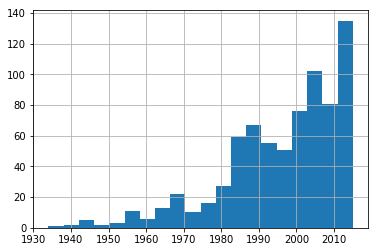

In [102]:
df.yr_renovated.loc[df.yr_renovated>0].hist(bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002134B0D9BA8>,
      dtype=object)

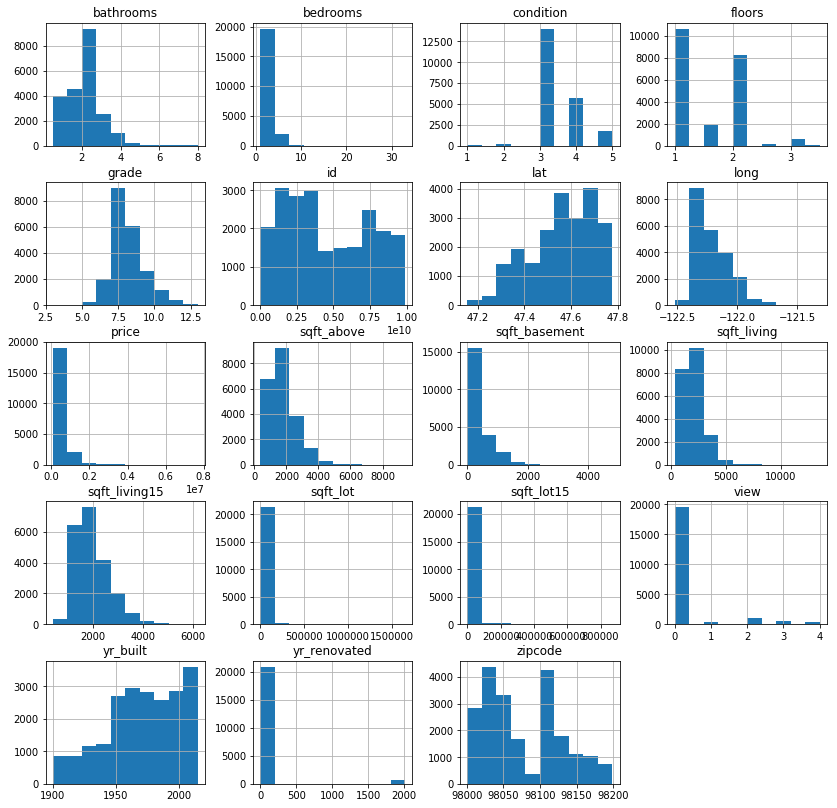

In [70]:
df.hist(figsize=(14,14))

Heavily skewed price data, bedrooms, bathroom, sqft_lot, sqft_living
from previous description bedrooms goes all the way up to 33 but is this an outlier?

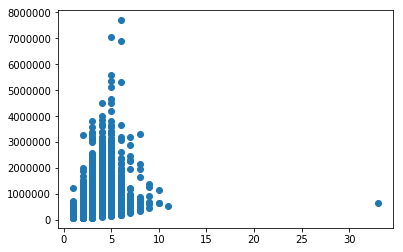

In [72]:
plt.scatter(df.bedrooms,df.price)

It is, Something weird going in with this entry thats too many bedrooms. Check out the whole entry

In [73]:
df.loc[df.bedrooms==33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


33 bedrooms and 1.75 bathrooms. I wouldn't want to live there. And all on a 1620 sqft living area? Those bedrooms are less than 50 sqft each. Is this a jail? Dropped

In [74]:
df.drop(labels=15856, axis=0, inplace=True)

In [104]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159600e+04,2.159600e+04,21596.000000,21596.000000,21596.000000,2.159600e+04,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000
mean,4.580575e+09,5.402920e+05,3.371828,2.115843,2080.343165,1.509983e+04,1.494119,0.233191,3.409752,7.657946,1788.631506,291.711660,1971.000787,68.761391,98077.950685,47.560087,-122.213977,1986.650722,12758.656649
std,2.876764e+09,3.673760e+05,0.904114,0.768998,918.122038,4.141355e+04,0.539685,0.764689,0.650471,1.173218,827.763251,442.673703,29.375460,364.045627,53.514040,0.138552,0.140725,685.231768,27275.018316
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308950e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068550e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


OK, histograms again

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002134DA9FCF8>,
      dtype=object)

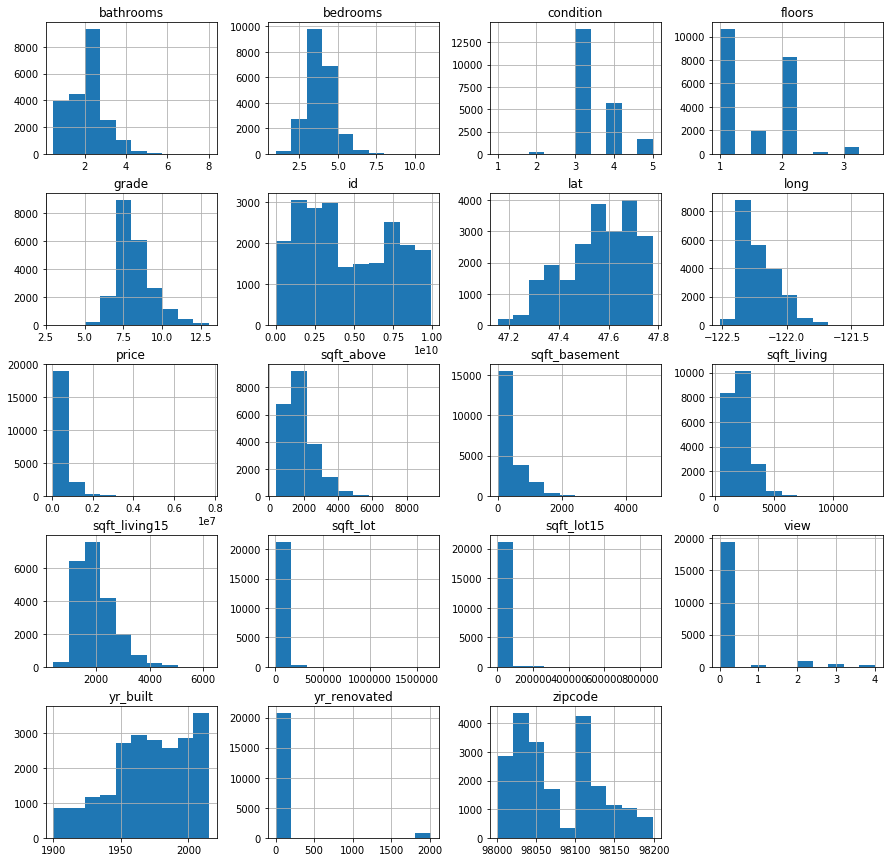

In [76]:
df.hist(figsize=(15,15))

form the price scatter plot it looks like there are a few high price outliers worth looking at in more detail

In [82]:
a=list(df.price)
b=sorted(a,reverse=True)
b[0:10]

[7700000.0,
 7060000.0,
 6890000.0,
 5570000.0,
 5350000.0,
 5300000.0,
 5110000.0,
 4670000.0,
 4500000.0,
 4490000.0]

Top 3 are noticabely higher, worth a closer look

In [88]:
df.loc[df.price==7700000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.0,12050,27600,2.5,0.0,3.0,...,13,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800


In [85]:
df.loc[df.price==7060000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3910,9808700762,6/11/2014,7060000.0,5,4.5,10040,37325,2.0,1.0,2.0,...,11,7680,2360.0,1940,2001.0,98004,47.65,-122.214,3930,25449


In [86]:
df.loc[df.price==6890000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0.0,4.0,...,13,8860,1030.0,2001,0.0,98039,47.6305,-122.24,4540,42730


big houses on big lots plenty of bedroom plenty of bathrooms high grade indicates high quality fixtures and workmanship, yeah these are just expensive houses...

Remeber yr_renovated? that histogram looks highly skewed because we had all those zeros. what does the rest of the data look like?

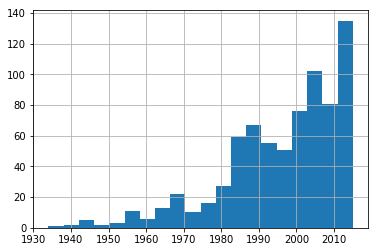

In [103]:
df.yr_renovated.loc[df.yr_renovated>0].hist(bins=20)

I could probably try binning this? Not renovated, renovated before 2000 and renovated after 2000?

Maybe took a look at some of this skewed data, what are the outliers?


In [111]:
a=list(df.sqft_lot)
b=sorted(a,reverse=True)
b[0:20]

[1651359,
 1164794,
 1074218,
 1024068,
 982998,
 982278,
 920423,
 881654,
 871200,
 871200,
 843309,
 715690,
 641203,
 623779,
 577605,
 542322,
 533610,
 507038,
 505166,
 503989]

In [112]:
df.loc[df.sqft_lot==1164794]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17305,3326079016,5/4/2015,190000.0,2,1.0,710,1164794,1.0,0.0,0.0,...,5,710,0.0,1915,0.0,98014,47.6888,-121.909,1680,16730


these big lots have got to be farms or something, big variation in house types in this data set

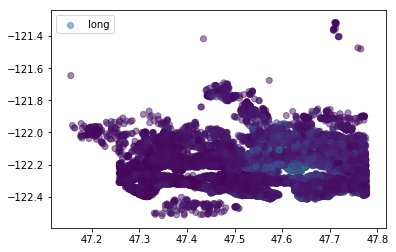

In [130]:
plt.scatter(df.lat,df.long, alpha=0.5,c=(df.price/100000))
